#                    Stock price prediction with linear regression


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

<IPython.core.display.Javascript object>


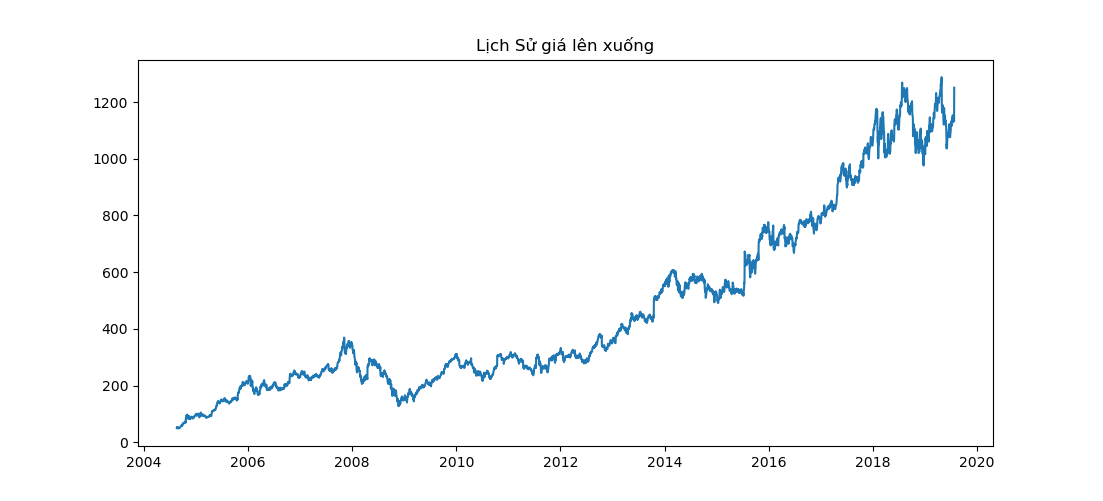

In [2]:
df = pd.read_csv('Google.csv')
df.Date = df['Date'].astype('datetime64[ns]')
df.set_index('Date', inplace=True)
%matplotlib nbagg
plt.figure(figsize=(11,5))
plt.plot(df['Close'])
plt.title('Lịch Sử giá lên xuống')
plt.show()


In [4]:
# tạo một biến gọi là forecast_out, để lưu trữ số ngày để dự đoán trong tương lai
forecast_out = 65
#Tạo một cột khác (mục tiêu) đã chuyển '65' đơn vị lên
df['Prediction'] = df[['Close']].shift(-forecast_out)
# Tạo X dữ liệu độc lập
X = np.array(df.drop(['Prediction'], axis=1))
# Lấy 65 của forecast ra khỏi X
X = X[:-forecast_out]
print(f'giá trị x: {X}')
# tạo biến phục thuộc y
y = np.array(df['Prediction'])
# Nhận tất cả các giá trị y ngoại trừ hàng 65 cuối cùng
y = y[:-forecast_out]
print(f'giá trị y :{y}')

giá trị x: [[4.98132860e+01 5.18357090e+01 4.78008310e+01 4.99826550e+01
  4.99826550e+01 4.48713000e+07]
 [5.03164020e+01 5.43363340e+01 5.00623550e+01 5.39527700e+01
  5.39527700e+01 2.29428000e+07]
 [5.51682170e+01 5.65281180e+01 5.43213880e+01 5.44957350e+01
  5.44957350e+01 1.83428000e+07]
 ...
 [1.23598999e+03 1.24908997e+03 1.22831006e+03 1.24883997e+03
  1.24883997e+03 8.07300000e+05]
 [1.25068994e+03 1.26900000e+03 1.24638000e+03 1.26455005e+03
  1.26455005e+03 1.31990000e+06]
 [1.26412000e+03 1.26801001e+03 1.25500000e+03 1.25600000e+03
  1.25600000e+03 1.01880000e+06]]
giá trị y :[  84.383713   82.241737   83.44722  ... 1137.810059 1132.119995
 1250.410034]


In [37]:
# #separate data training/testing - 70%/20%
split_percentage = 0.7
split = int(split_percentage*len(df))

X_train = X[:split]
Y_train = y[:split]

X_test = X[split:]
Y_test = y[split:]

print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)
# from sklearn.model_selection import train_test_split
# X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.2)
# print(X_train.shape)
# print(Y_train.shape)
# print(X_test.shape)
# print(Y_test.shape)

(2632, 6)
(2632,)
(1063, 6)
(1063,)


In [38]:
#Using Model
model= LinearRegression()
# Train the model
model.fit(X_train, Y_train)
lr_confidence = model.score(X_test, Y_test)
print("ratio predict: ", lr_confidence)

ratio predict:  0.7248543855064311


In [46]:
x_forecast = np.array(df.drop(['Prediction'], axis=1))
a = x_forecast[-forecast_out:]
#predicted
lr_prediction = model.predict(a)
print("dự đoán trong {}:{} ".format(forecast_out,lr_prediction))

dự đoán trong 65:[1213.25246126 1224.05276094 1223.98216624 1136.27311155 1120.00135847
 1114.77711058 1134.82749008 1129.46045773 1113.27342177 1125.72938671
 1114.09175905 1100.45748114 1078.15244941 1075.46525395 1065.46177207
 1121.21541724 1115.70462773 1096.76144061 1106.24491049 1112.42567337
 1095.81592855 1090.79360755 1091.22842097 1069.39283584 1082.37405266
 1071.00514499  969.84322113 1003.49604607  995.42371266 1007.83477981
 1016.79287376 1036.04753159 1032.51028134 1039.89599428 1050.64574679
 1050.10649952 1056.23116758 1062.23592928 1063.71237671 1071.10639079
 1077.57846621 1080.26936112 1032.65299965 1035.00583316 1043.57372823
 1049.93502403 1060.71708392 1070.86524353 1083.28877616 1085.84115378
 1076.94119224 1074.34035067 1102.21672844 1104.8410115  1110.35673589
 1110.84307182 1112.25926186 1109.17614123 1102.30461986 1084.15122839
 1094.27505649 1101.78401606 1092.78935709 1082.92589688 1166.34049698] 


In [50]:
# plt.plot(lr_prediction)
# plt.show

<IPython.core.display.Javascript object>


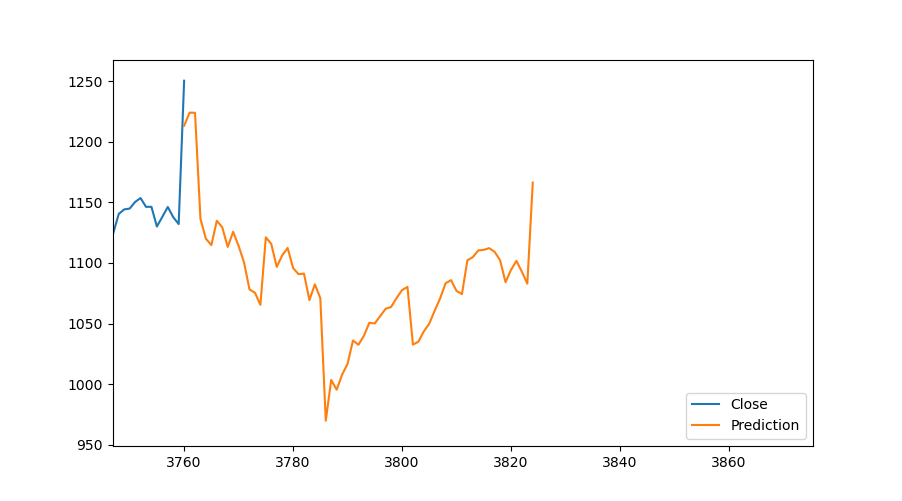

<class 'pandas.core.series.Series'>
Date
2004-08-19      49.982655
2004-08-20      53.952770
2004-08-23      54.495735
2004-08-24      52.239193
2004-08-25      52.802086
                 ...     
2019-07-22    1138.069946
2019-07-23    1146.209961
2019-07-24    1137.810059
2019-07-25    1132.119995
2019-07-26    1250.410034
Name: Close, Length: 3760, dtype: float64


In [51]:
num=[]
for  i in range(1,len(df)+1):
    num.append(i)
x = np.asarray(num)
list=[i for i in range(len(df['Close']),len(df['Close'])+forecast_out,1)]
plt.figure(figsize=(9,5))
plt.plot(x,df['Close'],label='Close')
plt.plot(list,lr_prediction,label='Prediction')
plt.legend(loc=4)
plt.show()
print(type(df['Prediction']))
print(df['Close'])